In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

In [2]:
import pandas as pd
import numpy as np
import sys # 최대 정수를 가져오기위해
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 로지스틱 회귀분석 (이진분류)
## 1. 데이터 셋 생성 & 전처리

In [3]:
# 1. csv파일을 데이터프레임을 읽어오기(결측치 처리, 균형데이터 여부 확인). 기본 encoding=utf-8
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.head()
# 0. 임신횟수
# 1. 2시간내 포도당 농도
# 2. 혈압
# 3. 피부접힘 두께
# 4. 인슐린수치
# 5. BMI체질량지수
# 6. 가족력
# 7. 나이
# 8. 당뇨병 여부

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [20]:
# 타겟변수 균형
df[8].value_counts()

0    500
1    268
Name: 8, dtype: int64

In [22]:
df.values
df.to_numpy()

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
# 2. csv 파일을 numpy 배열로 읽어오기 (결측치 처리가 힘듬). 기본 encoding=cp949, np.loadtxt() #이 있는 행은 제외하고 읽어오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf8')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [8]:
# 데이터 분할: 학습데이터셋(모델 학습용) + 시험데이터셋(모델평가용)
X_train = dataset[:620, :-1]
y_train = dataset[:620, -1]
X_test = dataset[620:, :-1]
y_test = dataset[620:, -1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((620, 8), (620,), (148, 8), (148,))

## 2. 모델구성

In [29]:
model = Sequential()
# model.add(Dense(units=32, input_shape=(8,), activation='relu'))
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='elu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                288       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [30]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 4. 학습

In [31]:
%%time
hist = model.fit(X_train, y_train, # 훈련데이터셋(학습데이터셋)
                epochs=200, batch_size=310,
                validation_split=0.1, # 검증데이터 비율
                verbose=0) #로그출력X

CPU times: total: 6.14 s
Wall time: 5.35 s


## 5. 모델 평가하기
- 학습과정 시각화하여 살펴보기
- 평가
- 교차표(혼동매트릭스, 성능평가지표) 그리기

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

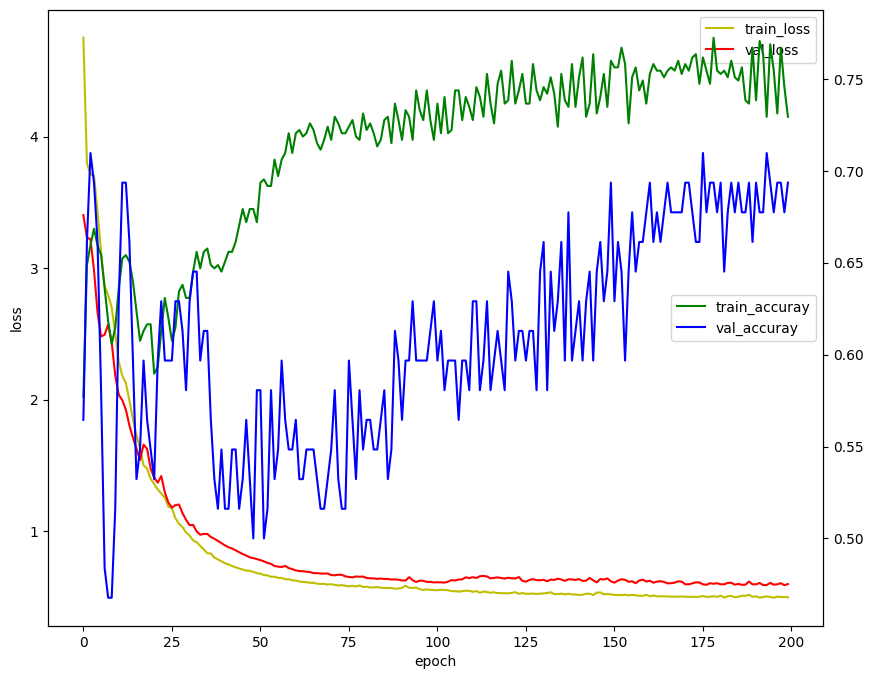

In [32]:
import matplotlib.pyplot as plt
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [34]:
model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7645


[0.5061715841293335, 0.7645161151885986]

In [38]:
# 평가하기
score = model.evaluate(X_test, y_test)
print("loss : {}, 정확도 : {:.2f}%".format(score[0], score[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.6824
loss : 0.6846645474433899, 정확도 : 68.24%


In [46]:
# 교차표(혼동매트릭스, 성능평가지표) 그리기 : 테스트셋의 실제값과 예측값
y_hat = (model.predict(X_test) >= 0.5).astype(int)
y_test.shape, y_hat.shape # 실제값(1차원), 예측값(2차원)

5/5 [==============================] - 0s 2ms/step


((148,), (148, 1))

In [61]:
TN, FP, FN, TP = (0, 0, 0, 0)
for y, h in zip(y_test, y_hat.reshape(-1)):
    if y==0 and h==0:
        TN += 1
    elif y==0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    else:
        TP += 1
print(TN, FP)
print(FN, TP)

83 13
34 18


In [57]:
pd.crosstab(y_test, y_hat.reshape(-1))

col_0,0,1
row_0,,
0.0,83,13
1.0,34,18


In [62]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

예측값,0,1
실제값,,
0.0,83,13
1.0,34,18


In [63]:
pd.crosstab(y_test, y_hat.reshape(-1), rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,83,13
1.0,34,18


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)
# 결과가 numpy 배열인 혼동행렬

array([[83, 13],
       [34, 18]], dtype=int64)

## 6. 모델 사용

In [66]:
X_test[0]

array([  2.   , 112.   ,  86.   ,  42.   , 160.   ,  38.4  ,   0.246,
        28.   ])

In [69]:
(model.predict([[2, 112, 86, 42, 160, 38.4, 0.246, 28],
               [1, 115, 86, 42, 160, 38.4, 0.246, 60]]) > 0.5).astype(int)

1/1 [==============================] - 0s 32ms/step


array([[0],
       [0]])

In [70]:
from tensorflow.keras.models import save_model, load_model
model.save('model/06_binary.h5')
save_model(model, 'model/06_binary.h5')

In [71]:
model2 = load_model('model/06_binary.h5')

In [73]:
(model2.predict([[2, 112, 86, 42, 160, 38.4, 0.246, 28]])>0.5).astype(int)

1/1 [==============================] - 0s 54ms/step


array([[0]])

# 분류분석
- 1. 데이터 생성 및 전처리 : 훈련셋 600, 검증셋 100, 테스트셋 68으로 분리, 타겟변수의 원핫인코딩
- 2. 모델생성 (INPUT8 -> OUTPUT1) : 출력층의 활성화함수 : 'softmax'
- 3. 모델학습과정 loss = categorical_crossentropy, metrics=['accuracy']
- 4. 모델학습 validation_data = [X_val, y_val]
- 5. 모델학습 평가
- 6. 모델사용(argmax 사용)

```
예측
  0   1
0.99 0.01
```

## 1. 데이터셋 생성 및 전처리

In [81]:
from tensorflow.keras.utils import to_categorical

In [74]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
dataset = df.values
dataset.shape

(768, 9)

In [80]:
# 훈련셋 600, 검증셋 100, 테스트셋 68
X_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
X_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [86]:
#분류분석을 위한 타겟(종속) 변수의 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((600, 8), (600, 2), (100, 8), (100, 2), (68, 8), (68, 2))

In [84]:
print('원 데이터 :', y_train[:3])
print('원핫인코딩데이터 :\n', Y_train[:3])

원 데이터 : [1. 0. 1.]
원핫인코딩데이터 :
 [[0. 1.]
 [1. 0.]
 [0. 1.]]


## 2. 모델생성(input 8, target2)

In [91]:
model = Sequential()
model.add(Dense(units=32, input_shape=(8,), activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                288       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정하기

In [92]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

## 4. 모델 학습

In [93]:
hist = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=200, batch_size=310, verbose=1)

Epoch 1/200
2/2 [==============================] - 1s 152ms/step - loss: 10.8669 - accuracy: 0.6533 - val_loss: 10.1762 - val_accuracy: 0.5700
Epoch 2/200
2/2 [==============================] - 0s 21ms/step - loss: 9.7054 - accuracy: 0.6483 - val_loss: 9.2658 - val_accuracy: 0.5700
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 8.8203 - accuracy: 0.6450 - val_loss: 8.3907 - val_accuracy: 0.5800
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 7.8248 - accuracy: 0.6450 - val_loss: 7.4584 - val_accuracy: 0.5800
Epoch 5/200
2/2 [==============================] - 0s 24ms/step - loss: 6.8508 - accuracy: 0.6467 - val_loss: 6.4737 - val_accuracy: 0.5500
Epoch 6/200
2/2 [==============================] - 0s 21ms/step - loss: 5.8312 - accuracy: 0.6450 - val_loss: 5.4819 - val_accuracy: 0.5200
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 4.8193 - accuracy: 0.6450 - val_loss: 4.4901 - val_accuracy: 0.5400
Epoch 8/200
2/2 [

2/2 [==============================] - 0s 21ms/step - loss: 0.8637 - accuracy: 0.6350 - val_loss: 1.0342 - val_accuracy: 0.5400
Epoch 60/200
2/2 [==============================] - 0s 30ms/step - loss: 0.8161 - accuracy: 0.6367 - val_loss: 1.1345 - val_accuracy: 0.4800
Epoch 61/200
2/2 [==============================] - 0s 21ms/step - loss: 1.0072 - accuracy: 0.6000 - val_loss: 1.2399 - val_accuracy: 0.4300
Epoch 62/200
2/2 [==============================] - 0s 22ms/step - loss: 0.8694 - accuracy: 0.6250 - val_loss: 1.0352 - val_accuracy: 0.5000
Epoch 63/200
2/2 [==============================] - 0s 22ms/step - loss: 0.8316 - accuracy: 0.6517 - val_loss: 1.1833 - val_accuracy: 0.4500
Epoch 64/200
2/2 [==============================] - 0s 22ms/step - loss: 1.0383 - accuracy: 0.6067 - val_loss: 1.2894 - val_accuracy: 0.4600
Epoch 65/200
2/2 [==============================] - 0s 25ms/step - loss: 0.9917 - accuracy: 0.6083 - val_loss: 1.1579 - val_accuracy: 0.4700
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 23ms/step - loss: 0.7423 - accuracy: 0.6633 - val_loss: 0.7880 - val_accuracy: 0.6600
Epoch 118/200
2/2 [==============================] - 0s 20ms/step - loss: 0.7118 - accuracy: 0.6683 - val_loss: 0.8200 - val_accuracy: 0.6500
Epoch 119/200
2/2 [==============================] - 0s 24ms/step - loss: 0.6706 - accuracy: 0.6850 - val_loss: 0.7483 - val_accuracy: 0.6800
Epoch 120/200
2/2 [==============================] - 0s 23ms/step - loss: 0.6124 - accuracy: 0.7283 - val_loss: 0.6876 - val_accuracy: 0.6100
Epoch 121/200
2/2 [==============================] - 0s 23ms/step - loss: 0.6035 - accuracy: 0.7050 - val_loss: 0.7047 - val_accuracy: 0.6100
Epoch 122/200
2/2 [==============================] - 0s 24ms/step - loss: 0.6119 - accuracy: 0.7117 - val_loss: 0.6853 - val_accuracy: 0.6200
Epoch 123/200
2/2 [==============================] - 0s 22ms/step - loss: 0.5936 - accuracy: 0.7133 - val_loss: 0.6909 - val_accuracy: 0.6700
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 22ms/step - loss: 0.6229 - accuracy: 0.6867 - val_loss: 0.7480 - val_accuracy: 0.6000
Epoch 176/200
2/2 [==============================] - 0s 24ms/step - loss: 0.6391 - accuracy: 0.6800 - val_loss: 0.6845 - val_accuracy: 0.6400
Epoch 177/200
2/2 [==============================] - 0s 24ms/step - loss: 0.6070 - accuracy: 0.7017 - val_loss: 0.6916 - val_accuracy: 0.6200
Epoch 178/200
2/2 [==============================] - 0s 21ms/step - loss: 0.5939 - accuracy: 0.6933 - val_loss: 0.6561 - val_accuracy: 0.6400
Epoch 179/200
2/2 [==============================] - 0s 24ms/step - loss: 0.5891 - accuracy: 0.7033 - val_loss: 0.6789 - val_accuracy: 0.6200
Epoch 180/200
2/2 [==============================] - 0s 21ms/step - loss: 0.6093 - accuracy: 0.7017 - val_loss: 0.7127 - val_accuracy: 0.6400
Epoch 181/200
2/2 [==============================] - 0s 21ms/step - loss: 0.7024 - accuracy: 0.6550 - val_loss: 0.8592 - val_accuracy: 0.5000
Epoch 

## 5. 모델평가

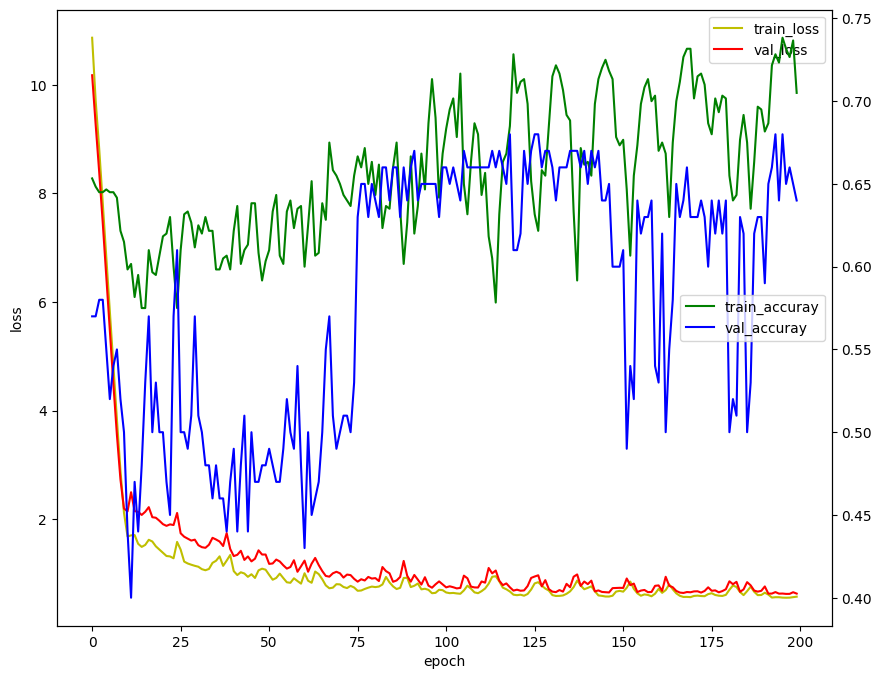

In [94]:
import matplotlib.pyplot as plt
# 학습과정 표시하기
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x 축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuray')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuray')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')
loss_ax.legend(loc='upper right')
acc_ax.legend(loc='center right')
plt.show()

In [95]:
# 모델 평가
model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5588


[0.6904187798500061, 0.5588235259056091]

In [99]:
# 혼동행렬, 교차표 (원핫인코딩을 다시 복구)
# y_test 실제값
y_hat = model.predict(X_test).argmax(axis=1)

3/3 [==============================] - 0s 2ms/step


In [100]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,27,14
1.0,16,11


In [101]:
confusion_matrix(y_test, y_hat)

array([[27, 14],
       [16, 11]], dtype=int64)

In [102]:
model.predict(X_test[0].reshape(-1,8))

1/1 [==============================] - 0s 20ms/step


array([[0.41543815, 0.5845619 ]], dtype=float32)